# QSOs FITS

Import necessary libraries 

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd 
import os
from urllib import request
import ssl
from astropy.io import fits



Function to download data from a txt file with links 

In [101]:
file = "download_url.7.txt"
def Download_data(file,n):
    files = "FITS_data"
    f = open(file,"r")
    ssl._create_default_https_context = ssl._create_unverified_context
    try:
        os.mkdir(files)
    except OSError:
        print("Creation of the directory %s already was done" % files)
    else:
        print ("Successfully created the directory %s" % files)
        
    for i in f.readlines()[0:n]:
        print(i[-26:-1])
        request.urlretrieve(i, files+"/"+i[-26:-1])


Download_data(file,50)

Creation of the directory FITS_data already was done
spec-0288-52000-0266.fits
spec-0514-51994-0450.fits
spec-0597-52059-0604.fits
spec-0599-52317-0297.fits
spec-0599-52317-0483.fits
spec-0777-52320-0058.fits
spec-0777-52320-0116.fits
spec-0778-52337-0231.fits
spec-0778-52337-0504.fits
spec-0778-54525-0229.fits
spec-0778-54525-0507.fits
spec-0840-52374-0047.fits
spec-0841-52375-0411.fits
spec-0880-52367-0491.fits
spec-0881-52368-0206.fits
spec-0884-52374-0268.fits
spec-0952-52409-0035.fits
spec-0968-52412-0229.fits
spec-0970-52413-0120.fits
spec-1015-52709-0084.fits
spec-1015-52734-0085.fits
spec-1229-52723-0397.fits
spec-1229-52723-0409.fits
spec-1314-52792-0419.fits
spec-1314-52792-0477.fits
spec-1314-53050-0420.fits
spec-1314-53050-0472.fits
spec-1367-53083-0419.fits
spec-1367-53083-0424.fits
spec-1368-53084-0518.fits
spec-1368-53084-0555.fits
spec-1368-53084-0565.fits
spec-1369-53089-0392.fits
spec-1369-53089-0581.fits
spec-1369-53089-0611.fits
spec-1444-53054-0011.fits
spec-1444-5

Save data the plot data and make a few plots

In [173]:
datadir = "FITS_data/"
I = []
for i in range(len(os.listdir(datadir))):
    I.append(fits.open(datadir+os.listdir(datadir)[i]))


X = [];Y = [];titles =[]

for img in range(len(os.listdir(datadir))):
    X.append(np.array([I[img][1].data[i][1] for i in range(len(I[img][1].data))]))
    Y.append(np.array([I[img][1].data[i][0] for i in range(len(I[img][1].data))]))
    titles.append(os.listdir(datadir)[img])



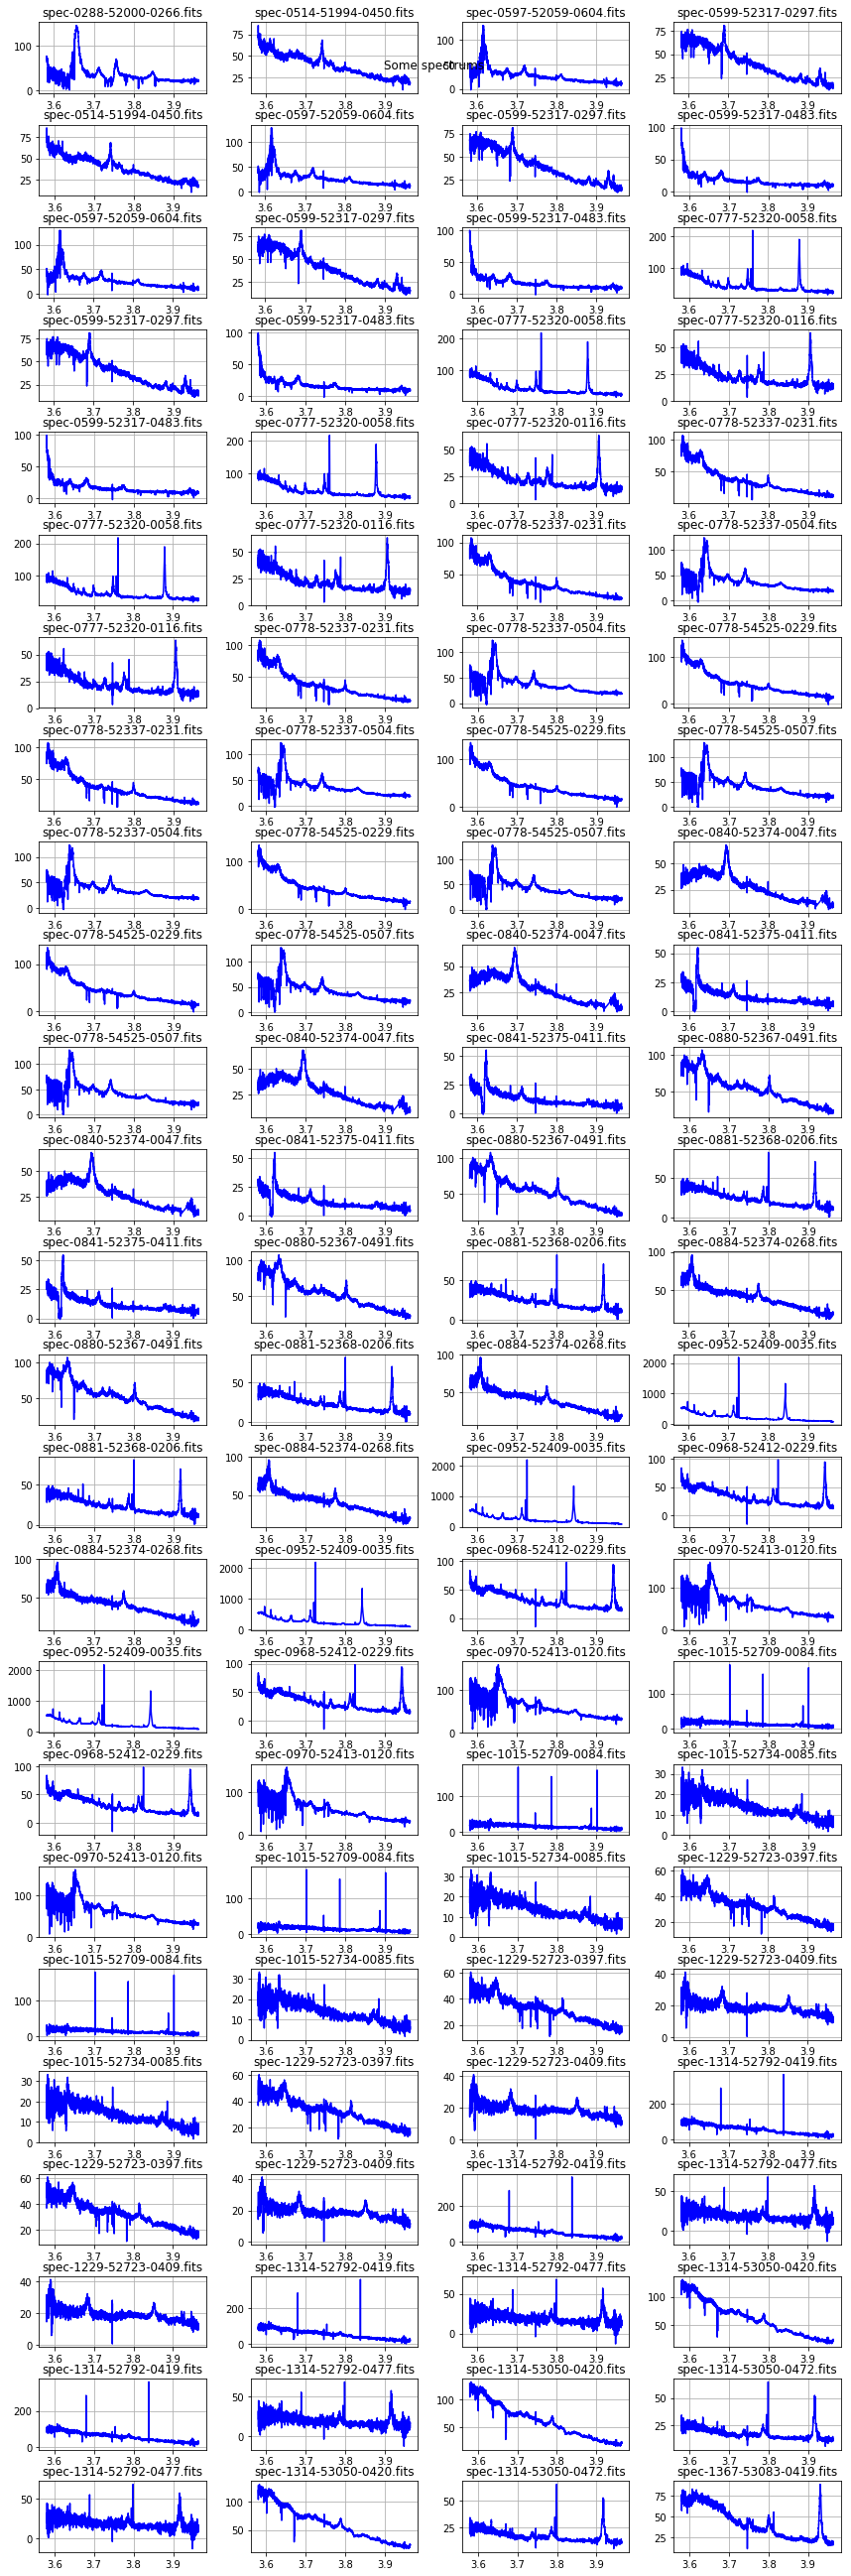

In [172]:
fig, ax = plt.subplots(25, 4, figsize = (12, 36))
fig.suptitle('Some spectrums')
#fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
fig.tight_layout()
for x, y in [(i,j) for i in range(25) for j in range (4)]:
    ax[x,y].plot(X[x+y],Y[x+y],"b-")
    ax[x,y].grid(True)
    ax[x,y].set_title(titles[x+y])
